In [ ]:
#Install Dependencies
!pip install kagglehub pandas numpy matplotlib seaborn scikit-learn

In [ ]:
import kagglehub
import pandas as pd
from kagglehub import KaggleDatasetAdapter

#Load Dataset
file_path = "data.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "shriyashjagtap/indian-personal-finance-and-spending-habits",
    file_path,
)

print(df.head())

/tmp/ipython-input-1113622769.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 8.23M/8.23M [00:00<00:00, 27.2MB/s]


          Income  Age  Dependents     Occupation City_Tier          Rent  \
0   44637.249636   49           0  Self_Employed    Tier_1  13391.174891   
1   26858.596592   34           2        Retired    Tier_2   5371.719318   
2   50367.605084   35           1        Student    Tier_3   7555.140763   
3  101455.600247   21           0  Self_Employed    Tier_3  15218.340037   
4   24875.283548   52           4   Professional    Tier_2   4975.056710   

   Loan_Repayment    Insurance     Groceries    Transport  ...  \
0        0.000000  2206.490129   6658.768341  2636.970696  ...   
1        0.000000   869.522617   2818.444460  1543.018778  ...   
2     4612.103386  2201.800050   6313.222081  3221.396403  ...   
3     6809.441427  4889.418087  14690.149363  7106.130005  ...   
4     3112.609398   635.907170   3034.329665  1276.155163  ...   

   Desired_Savings  Disposable_Income  Potential_Savings_Groceries  \
0      6200.537192       11265.627707                  1685.696222   
1     

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [ ]:
#Data Processing
#Separating Numerical and Categorical Data
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print(num_cols)
print(cat_cols)

Index(['Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 'Insurance',
       'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities',
       'Healthcare', 'Education', 'Miscellaneous',
       'Desired_Savings_Percentage', 'Desired_Savings', 'Disposable_Income',
       'Potential_Savings_Groceries', 'Potential_Savings_Transport',
       'Potential_Savings_Eating_Out', 'Potential_Savings_Entertainment',
       'Potential_Savings_Utilities', 'Potential_Savings_Healthcare',
       'Potential_Savings_Education', 'Potential_Savings_Miscellaneous'],
      dtype='object')
Index(['Occupation', 'City_Tier'], dtype='object')


In [ ]:
#One-hot Encoding for cat-data

df_encoded = pd.get_dummies(df,columns=cat_cols,drop_first=True)

print(df_encoded.head(3))

         Income  Age  Dependents          Rent  Loan_Repayment    Insurance  \
0  44637.249636   49           0  13391.174891        0.000000  2206.490129   
1  26858.596592   34           2   5371.719318        0.000000   869.522617   
2  50367.605084   35           1   7555.140763     4612.103386  2201.800050   

     Groceries    Transport   Eating_Out  Entertainment  ...  \
0  6658.768341  2636.970696  1651.801726    1536.184255  ...   
1  2818.444460  1543.018778   649.378103    1050.241738  ...   
2  6313.222081  3221.396403  1513.814376    1723.306926  ...   

   Potential_Savings_Entertainment  Potential_Savings_Utilities  \
0                       195.151320                   678.292859   
1                       234.131168                   286.668408   
2                       459.965256                   488.383423   

   Potential_Savings_Healthcare  Potential_Savings_Education  \
0                     67.682471                     0.000000   
1                      6.6032

In [ ]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

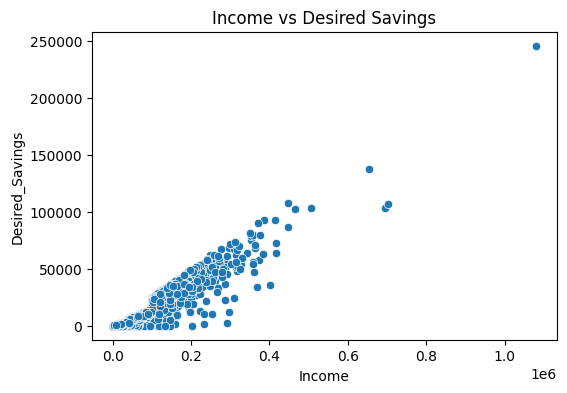

In [ ]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(x=df['Income'],y=df['Desired_Savings'])
plt.title("Income vs Desired Savings")
plt.show()

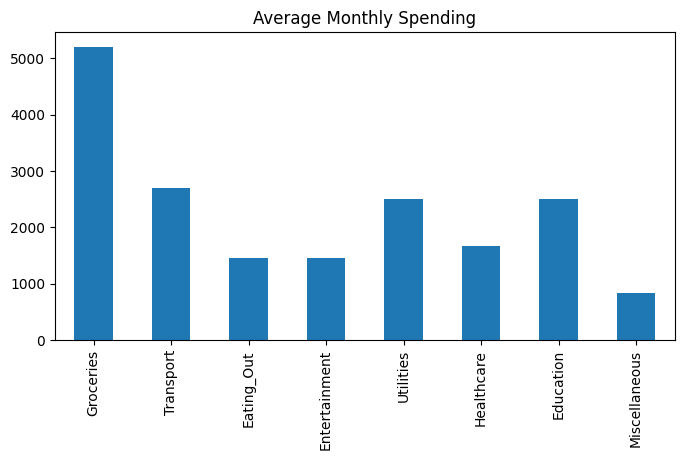

In [ ]:
#Spending Breakdown

spending_cols = [
    'Groceries','Transport','Eating_Out','Entertainment',
    'Utilities','Healthcare','Education','Miscellaneous'
]

df[spending_cols].mean().plot(kind='bar',figsize=(8,4))
plt.title("Average Monthly Spending")
plt.show()

In [ ]:
#Linear Regression

#Define X and Y

x = df_encoded.drop(columns=['Desired_Savings'])
y = df_encoded['Desired_Savings']

#Train-Test Split
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(
    x, y,test_size=0.2, random_state=42
)

#Train

from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train,y_train)


#Evaluate

from sklearn.metrics import mean_squared_error, r2_score

preds = reg.predict(X_test)

print("MSE: ",mean_squared_error(y_test,preds))
print("R-squared: ",r2_score(y_test,preds))

MSE:  0.09034227465114099
R-squared:  0.9252109880132271


In [ ]:
#Classification / Logistic regression

df['Can_Save'] = (df['Disposable_Income'] >= df['Desired_Savings']).astype(int)


X = df_encoded.drop(columns=['Desired_Savings'])
y = df['Can_Save']


X_train , X_test ,y_train , y_test = train_test_split(
    X ,y , test_size=0.2,random_state=42
)

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)


from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

y_pred = clf.predict(X_test)

print("Accuracy: ",accuracy_score(y_test,y_test))
print(confusion_matrix(y_pred,y_pred))
print(classification_report(y_test, y_pred))


Accuracy:  1.0
[[   8    0]
 [   0 3992]]
              precision    recall  f1-score   support

           0       1.00      0.24      0.39        33
           1       0.99      1.00      1.00      3967

    accuracy                           0.99      4000
   macro avg       1.00      0.62      0.69      4000
weighted avg       0.99      0.99      0.99      4000



In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

X = df_encoded.drop(columns=['Desired_Savings'])
y = df['Can_Save']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.99175
